# Coffee Price Machine Learning(1979-2020)

## Merging Data

In [3]:
import pandas as pd

In [4]:
# read csv files. These files are downloaded from "https://www.investing.com/commodities/us-coffee-c-historical-data"
data_1 = pd.read_csv("Data/US Coffee C Futures Historical Data.csv")
data_2 = pd.read_csv("Data/US Coffee C Futures Historical Data (1).csv")
data_3 = pd.read_csv("Data/US Coffee C Futures Historical Data (2).csv")


In [5]:
#combine data
data = [data_1,data_2,data_3]
combined_data = pd.concat(data)

In [6]:
# sorting data
combined_data['Date'] = pd.to_datetime(combined_data['Date'], yearfirst=True)
combined_data.sort_values('Date', ascending=True)

,Date,Price,Open,High,Low,Vol.,Change %
4999,1979-12-27,183.18,188.35,188.50,183.00,-,-2.23%
4998,1979-12-28,181.53,183.00,185.75,181.00,-,-0.90%
4997,1979-12-31,181.75,182.25,182.75,181.00,-,0.12%
4996,1980-01-02,177.58,182.10,182.25,176.00,1.14K,-2.29%
4995,1980-01-03,171.50,176.50,176.50,170.50,1.44K,-3.42%
...,...,...,...,...,...,...,...
4,2020-04-20,113.65,116.30,116.75,113.05,5.97K,-2.07%
3,2020-04-21,109.65,113.00,113.55,109.35,8.79K,-3.52%
2,2020-04-22,110.60,109.65,112.10,109.65,0.12K,0.87%
1,2020-04-23,111.05,112.00,113.60,110.65,0.04K,0.41%


In [313]:
combined_data.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

## Learning the Data Prior to Machine Learning

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
combined_data.describe()

,Price,Open,High,Low
count,10171.000000,10171.000000,10171.000000,10171.000000
mean,124.434142,124.410462,126.016343,122.964196
std,44.370819,44.409733,45.058768,43.720470
min,41.500000,41.500000,42.000000,41.500000
25%,95.700000,95.800000,97.000000,94.800000
50%,122.640000,122.500000,124.000000,121.100000
75%,142.900000,143.035000,144.250000,141.600000
max,314.800000,305.300000,318.000000,304.000000


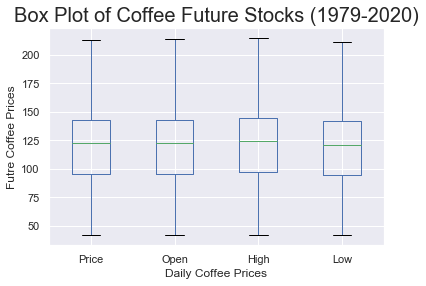

In [237]:
combined_data.boxplot(showfliers=False)
plt.title("Box Plot of Coffee Future Stocks (1979-2020)", fontsize=20)
plt.xlabel("Daily Coffee Prices")
plt.ylabel("Futre Coffee Prices")
plt.savefig("output/boxplotcoffee.png")

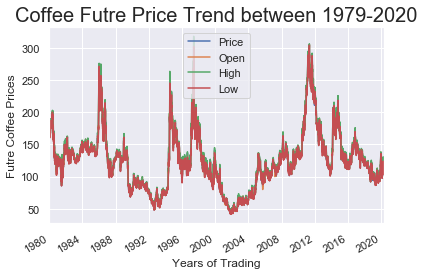

In [238]:
combined_data.plot(x='Date')
plt.title("Coffee Futre Price Trend between 1979-2020", fontsize=20)
plt.xlabel("Years of Trading")
plt.ylabel("Futre Coffee Prices")
plt.savefig("output/coffeepricetrend.png")

Closing price, open price, high price, and low prices are almost identifical to each other. Biggest differences can be found between high price and low price as expected. 

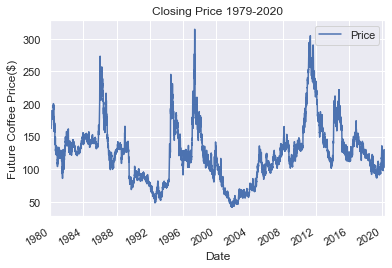

In [239]:
combined_data.plot(x='Date',y='Price')
plt.title('Closing Price 1979-2020')
plt.xlabel('Date')
plt.ylabel('Future Coffee Price($)')
plt.savefig("output/closingprice.png")

C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


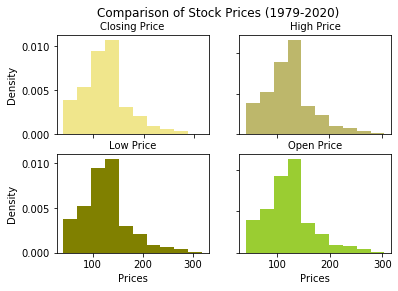

In [322]:
#combined_data.hist(density = True)
fig, axs = plt.subplots(2,2)
axs[0, 0].hist(combined_data['Price'], density = True, color='khaki' ,label='Closing Price')
axs[0, 1].hist(combined_data['Open'], density = True, color='darkkhaki' ,label='High Price')
axs[1, 0].hist(combined_data['High'],density = True, color='olive', label='Low Price')
axs[1, 1].hist(combined_data['Low'],density = True, color='yellowgreen',label='Open Price')

axs[0, 0].set_title('Closing Price', fontsize = 10)
axs[0, 1].set_title('High Price', fontsize = 10)
axs[1, 0].set_title('Low Price', fontsize = 10)
axs[1, 1].set_title('Open Price', fontsize = 10)

for ax in axs.flat:
    ax.set(xlabel='Prices', ylabel='Density')
    ax.label_outer()
    
fig.suptitle('Comparison of Stock Prices (1979-2020)')
fig.savefig('output/combined_hist.jpg')
fig.show()

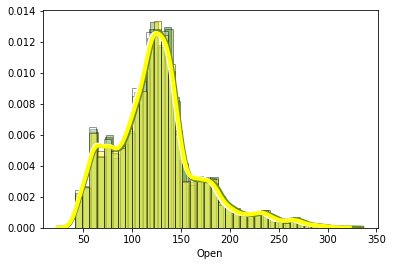

In [329]:
import seaborn as sns
sns.distplot(combined_data['Price'], hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(combined_data['High'], hist=True, kde=True, 
             bins=int(180/5), color = 'olivedrab', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(combined_data['Low'], hist=True, kde=True, 
             bins=int(180/5), color = 'white', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(combined_data['Open'], hist=True, kde=True, 
             bins=int(180/5), color = 'yellow', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



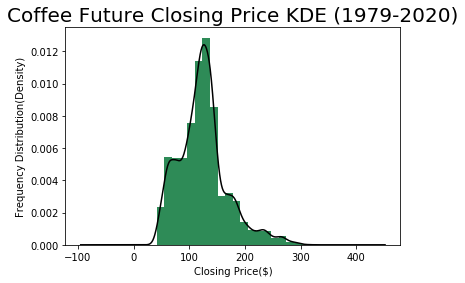

In [121]:
combined_data['Price'].hist(bins=20, density=True, color='seagreen')
combined_data['Price'].plot(kind='kde', color='black')
plt.title('Coffee Future Closing Price KDE (1979-2020)', fontsize = 20)
plt.xlabel('Closing Price($)')
plt.ylabel('Frequency Distribution(Density)')
plt.savefig("output/closingpricedensity.png")

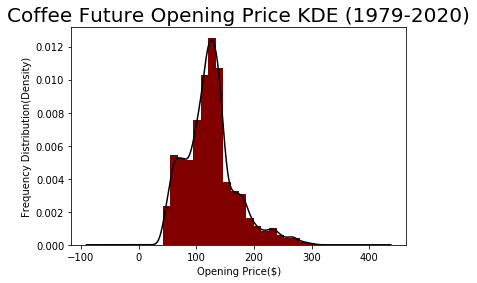

In [122]:
combined_data['Open'].hist(bins=20, density=True, color='maroon')
combined_data['Open'].plot(kind='kde', color='black')
plt.title('Coffee Future Opening Price KDE (1979-2020)', fontsize = 20)
plt.xlabel('Opening Price($)')
plt.ylabel('Frequency Distribution(Density)')
plt.savefig("output/openingpricedensity.png")

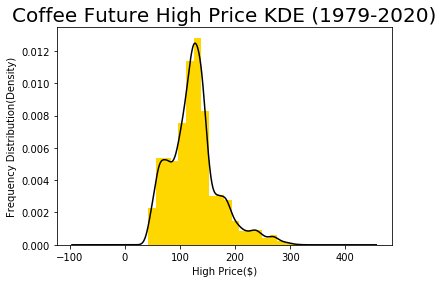

In [123]:
combined_data['High'].hist(bins=20, density=True, color='gold')
combined_data['High'].plot(kind='kde', color='black')
plt.title('Coffee Future High Price KDE (1979-2020)', fontsize = 20)
plt.xlabel('High Price($)')
plt.ylabel('Frequency Distribution(Density)')
plt.savefig("output/highpricedensity.png")

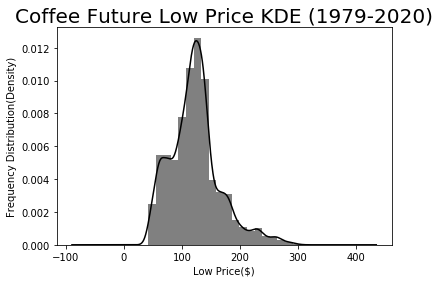

In [124]:
combined_data['Low'].hist(bins=20, density=True, color='gray')
combined_data['Low'].plot(kind='kde', color='black')
plt.title('Coffee Future Low Price KDE (1979-2020)', fontsize = 20)
plt.xlabel('Low Price($)')
plt.ylabel('Frequency Distribution(Density)')
plt.savefig("output/lowpricedensity.png")

## Coffee Price Data Analysis

coffee price stock data is from "https://www.investing.com/commodities/us-coffee-c-historical-data". Dataset is from 12/27/1979 to 04/24/2020. It contains closing price (Price), opening price(Open), high price (High),low price(Low), volume, and % change. df.describe() is used to get average, maximum, or minimum of coffee future price. The closing price, opening price, high price, and low price tends to be similar as they show very close average,maximum, and minimum prices. average stock price over 40 years is ~124 dollars. Maximum stock price is ~300 dollars. Minimum stock price is ~41.5 dollars.
There is less than 10 dollars difference between each prices. It is fair to say that price might go up and down due to economic reasons, but within the day, prices are pretty steady. Boxplot, histograms, and price trend graphs are visualized to assist these findings. 

## Coffee Future Price Machine Learning

## Data Preparing for Machine Learning

In [100]:
df = combined_data.drop(['Vol.','Change %'],axis=1)
df = df.set_index('Date')
df

,Price,Open,High,Low
Date,,,,
1999-12-01,127.25,130.00,132.00,125.00
1999-11-30,130.35,118.00,124.75,118.00
1999-11-29,114.25,108.25,114.25,108.25
1999-11-24,106.75,108.30,108.50,105.50
1999-11-23,107.10,107.50,108.50,106.00
...,...,...,...,...
2019-08-27,93.80,93.85,93.85,93.40
2019-08-26,94.15,92.15,94.85,92.15
2019-08-23,92.60,92.85,92.85,92.00


In [101]:
y = df['Price']
X = df.drop(columns = ["Price"])

print(X)
print(y)

              Open    High     Low
Date                              
1999-12-01  130.00  132.00  125.00
1999-11-30  118.00  124.75  118.00
1999-11-29  108.25  114.25  108.25
1999-11-24  108.30  108.50  105.50
1999-11-23  107.50  108.50  106.00
...            ...     ...     ...
2019-08-27   93.85   93.85   93.40
2019-08-26   92.15   94.85   92.15
2019-08-23   92.85   92.85   92.00
2019-08-22   93.15   93.60   92.25
2019-08-21   91.65   93.85   91.65

[10171 rows x 3 columns]
Date
1999-12-01    127.25
1999-11-30    130.35
1999-11-29    114.25
1999-11-24    106.75
1999-11-23    107.10
               ...  
2019-08-27     93.80
2019-08-26     94.15
2019-08-23     92.60
2019-08-22     93.50
2019-08-21     92.85
Name: Price, Length: 10171, dtype: float64


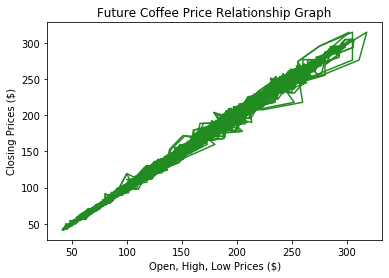

In [102]:
plt.plot(X,y, color = 'forestgreen')
plt.title("Future Coffee Price Relationship Graph")
plt.xlabel("Open, High, Low Prices ($)")
plt.ylabel("Closing Prices ($)")
plt.savefig("output/X,y Relationship.png")

This graph identifies relationship between X and y where X are High,Low, and Open Prices and y is Close Price. The data is showing linear pattern which suggest that best way to analyze this data set would be linear regression modeling. 

In [103]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [104]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=100)

In [105]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



## Linear Regression
### X_train, and y_train were used to train the data, but it gave lower accuracy, therefore raw X, y were used. It has accuracy of 0.99.

In [106]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.999334774319733
Testing Score: 0.9993508976652573


In [108]:
model.coef_

array([-0.6109064 ,  0.75813632,  0.85330809])

In [109]:
predict_lr = model.predict(X_test)

In [226]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,predict_lr )
r2_linear = model.score(X_test, y_test)
print(MSE,r2)

1.3172002382814438 0.9990997588982997


In [167]:
lr_prediction = pd.DataFrame({"Linear Predicted": predict_lr, "Actual": y_test, "Error": predict_lr - y_test})[["Linear Predicted", "Actual", "Error"]]
lr_prediction

,Linear Predicted,Actual,Error
Date,,,
1980-02-21,168.191082,168.46,-0.268918
1991-06-25,87.137749,86.65,0.487749
2008-01-07,131.262511,131.40,-0.137489
1999-06-28,101.027040,100.25,0.777040
1991-04-16,92.390789,92.15,0.240789
...,...,...,...
2017-05-05,132.584691,133.10,-0.515309
1982-03-17,142.940297,144.83,-1.889703
2000-12-19,65.542221,65.05,0.492221


In [160]:
cl = pd.DataFrame(y_test) 
cl.rename(columns={'Price':'Closing Price'},inplace=True)
cl

,Closing Price
Date,
1980-02-21,168.46
1991-06-25,86.65
2008-01-07,131.40
1999-06-28,100.25
1991-04-16,92.15
...,...
2017-05-05,133.10
1982-03-17,144.83
2000-12-19,65.05


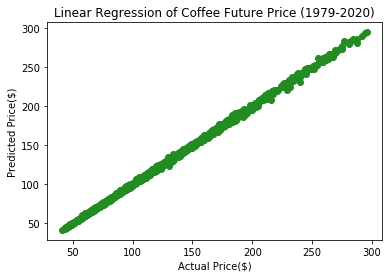

In [113]:
plt.scatter(y_test,predict_lr, color = 'forestgreen')
plt.title("Linear Regression of Coffee Future Price (1979-2020)")
plt.xlabel("Actual Price($)")
plt.ylabel("Predicted Price($)")
plt.savefig("output/lr_predicted_price.png")

## Logistic Regression Model
### This was not a good model for coffee price prediction as its accuracy was less than 0.001.

In [114]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
classifier.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

In [26]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [30]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1", "l2"]}
grid = GridSearchCV(classifier, param_grid, verbose=3)

In [31]:
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[CV] C=1, penalty=l2 .................................................


C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, penalty=l2, score=0.007, total= 2.0min
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.005, total= 2.0min
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.009, total= 1.8min
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.005, total= 2.0min
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.006, total= 2.2min
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] .

C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................... C=5, penalty=l2, score=0.009, total= 2.7min
[CV] C=5, penalty=l2 .................................................


C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................... C=5, penalty=l2, score=0.005, total= 2.5min
[CV] C=5, penalty=l2 .................................................


C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................... C=5, penalty=l2, score=0.009, total= 2.6min
[CV] C=5, penalty=l2 .................................................


C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ..................... C=5, penalty=l2, score=0.006, total= 2.6min
[CV] C=5, penalty=l2 .................................................


C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ..................... C=5, penalty=l2, score=0.008, total= 2.7min
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, penalty=l2 ................................................


C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................... C=10, penalty=l2, score=0.010, total= 2.9min
[CV] C=10, penalty=l2 ................................................


C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................... C=10, penalty=l2, score=0.007, total= 2.9min
[CV] C=10, penalty=l2 ................................................


C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................... C=10, penalty=l2, score=0.009, total= 2.7min
[CV] C=10, penalty=l2 ................................................


C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................... C=10, penalty=l2, score=0.007, total= 2.8min
[CV] C=10, penalty=l2 ................................................


C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 37.2min finished


[CV] .................... C=10, penalty=l2, score=0.006, total= 2.8min


C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [32]:
predictions = classifier.predict(X_test)

predictions

array([4482, 4482, 4482, ..., 4482, 4482, 4482], dtype=int64)

In [33]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'penalty': 'l2'}
0.0076032056377973055


## Ridge Regression Modeling
### Ridge Regression is a good model for coffee future price as its accuracy is 0.99.

In [116]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)


In [117]:
predict_rr = clf.predict(X_test)

In [118]:
training_score = clf.score(X_train, y_train)
testing_score = clf.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.999334774311552
Testing Score: 0.9993508891994224


In [227]:
MSE = mean_squared_error(y_test, predict_rr)
ridge_r2 = clf.score(X_test, y_test)
ridge_r2

0.9993508891994224

In [169]:
rr_prediction = pd.DataFrame({"Ridge Predicted": predict_rr, "Actual": y_test, "Error": predict_rr - y_test})[["Ridge Predicted", "Actual", "Error"]]
rr_prediction  

,Ridge Predicted,Actual,Error
Date,,,
1980-02-21,168.190959,168.46,-0.269041
1991-06-25,87.137859,86.65,0.487859
2008-01-07,131.262489,131.40,-0.137511
1999-06-28,101.027108,100.25,0.777108
1991-04-16,92.390881,92.15,0.240881
...,...,...,...
2017-05-05,132.584668,133.10,-0.515332
1982-03-17,142.940242,144.83,-1.889758
2000-12-19,65.542390,65.05,0.492390


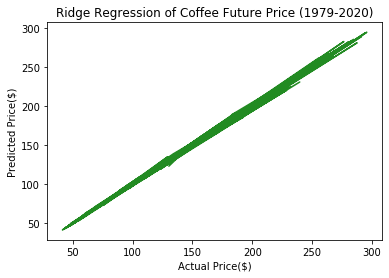

In [121]:
plt.plot(y_test,predict_rr, color = 'forestgreen')
plt.title("Ridge Regression of Coffee Future Price (1979-2020)")
plt.xlabel("Actual Price($)")
plt.ylabel("Predicted Price($)")
plt.savefig("output/rr_predicted_price.png")

## Decision Tree Modeling
### its accuracy is very close as seen on graph.

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X_test, y_test, cv=10)

array([0.99822611, 0.99809324, 0.99810252, 0.99820394, 0.99787349,
       0.9977136 , 0.99697497, 0.99846282, 0.99754171, 0.9980076 ])

In [124]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [125]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.999334774319733
Testing Score: 0.9993508976652573


In [127]:
predicted_dt = regressor.predict(X_test, check_input=True)

In [228]:

dt_r2 = regressor.score(X_test, y_test)
dt_r2

0.9982988346603872

In [170]:
dt_prediction = pd.DataFrame({"Decision Predicted": predicted_dt, "Actual": y_test, "Error": predicted_dt - y_test})[["Decision Predicted", "Actual", "Error"]]
dt_prediction 

,Decision Predicted,Actual,Error
Date,,,
1980-02-21,168.61,168.46,0.15
1991-06-25,86.27,86.65,-0.38
2008-01-07,131.65,131.40,0.25
1999-06-28,100.15,100.25,-0.10
1991-04-16,92.45,92.15,0.30
...,...,...,...
2017-05-05,130.30,133.10,-2.80
1982-03-17,142.00,144.83,-2.83
2000-12-19,65.20,65.05,0.15


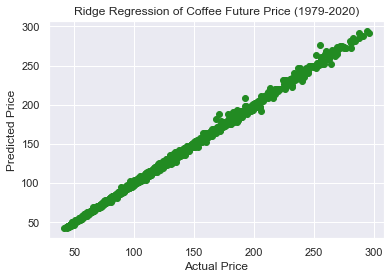

In [242]:
plt.scatter(y_test,predicted_dt, color = 'forestgreen')
plt.title("Ridge Regression of Coffee Future Price (1979-2020)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.savefig("output/dt_predicted_price.png")

## Lasso Modeling

In [132]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01).fit(X_train,y_train)
predict_la = lasso.predict(X_test)
r2 = lasso.score(X,y)
r2

C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6661.005150087029, tolerance: 1486.1903470383465
  positive)


0.9990997588982997

In [133]:
training_score = lasso.score(X_train, y_train)
testing_score = lasso.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9991080397239445
Testing Score: 0.9990758991317943


In [171]:
la_prediction = pd.DataFrame({"Lasso Predicted": predict_la, "Actual": y_test, "Error": predict_la - y_test})[["Lasso Predicted", "Actual", "Error"]]
la_prediction 

,Lasso Predicted,Actual,Error
Date,,,
1980-02-21,167.464537,168.46,-0.995463
1991-06-25,86.890264,86.65,0.240264
2008-01-07,131.522981,131.40,0.122981
1999-06-28,100.686775,100.25,0.436775
1991-04-16,92.184758,92.15,0.034758
...,...,...,...
2017-05-05,132.204644,133.10,-0.895356
1982-03-17,143.127411,144.83,-1.702589
2000-12-19,65.532481,65.05,0.482481


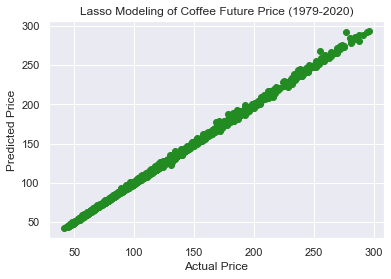

In [241]:
plt.scatter(y_test,predict_la, color = 'forestgreen')
plt.title("Lasso Modeling of Coffee Future Price (1979-2020)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.savefig("output/la_predicted_price.png")

## ElasticNet model

In [137]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)
predict_ela = elasticnet.predict(X_test)

C:\Users\irism\Anaconda\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6654.716320077177, tolerance: 1486.1903470383465
  positive)


In [138]:
training_score = elasticnet.score(X_train, y_train)
testing_score = elasticnet.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9991089719963556
Testing Score: 0.9990770983942867


In [229]:
MSE = mean_squared_error(y_test, predict_ela)
el_r2 = elasticnet.score(X_test, y_test)
el_r2

0.9990770983942867

In [172]:
ela_prediction = pd.DataFrame({"ElasticNet Predicted": predict_ela, "Actual": y_test, "Error": predict_ela - y_test})[["ElasticNet Predicted", "Actual", "Error"]]
ela_prediction 

,ElasticNet Predicted,Actual,Error
Date,,,
1980-02-21,167.465447,168.46,-0.994553
1991-06-25,86.891592,86.65,0.241592
2008-01-07,131.521802,131.40,0.121802
1999-06-28,100.687444,100.25,0.437444
1991-04-16,92.184825,92.15,0.034825
...,...,...,...
2017-05-05,132.204457,133.10,-0.895543
1982-03-17,143.126545,144.83,-1.703455
2000-12-19,65.532339,65.05,0.482339


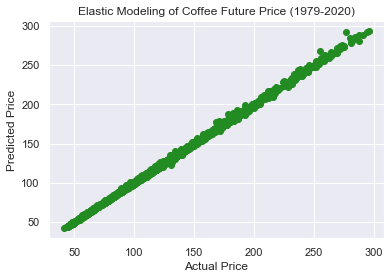

In [240]:
plt.scatter(y_test,predict_ela, color = 'forestgreen')
plt.title("Elastic Modeling of Coffee Future Price (1979-2020)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.savefig("output/ela_predicted_price.png")

## Random Regressor Modeling

In [142]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor()
model_rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [143]:
importances = model_rfr.feature_importances_
df_imp = pd.DataFrame(sorted(zip(importances, df.columns), reverse=True)).rename(columns={0:'Value'})
#df_imp.columns
df_imp

,Value,1
0,0.596823,High
1,0.402793,Open
2,0.000384,Price


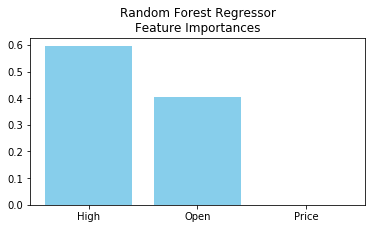

In [144]:
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)
plt.bar(df_imp[1], df_imp['Value'], color='skyblue')
plt.title("Random Forest Regressor\nFeature Importances")
plt.savefig('output/price_feature_importances.png')

Random Forest Regressor is used to identify unique attributes for coffee price. High price has most contribution toward the modeling followed by open price. low price is so low it is dropped out.  

In [182]:
all = [lr_prediction, rr_prediction, dt_prediction, la_prediction, ela_prediction]
final = pd.concat(all,axis = 1, sort = True)
final

,Linear Predicted,Actual,Error,Ridge Predicted,Actual,Error,Decision Predicted,Actual,Error,Lasso Predicted,Actual,Error,ElasticNet Predicted,Actual,Error
Date,,,,,,,,,,,,,,,
1980-01-14,177.308557,178.93,-1.621443,177.308397,178.93,-1.621603,177.58,178.93,-1.35,178.677096,178.93,-0.252904,178.673746,178.93,-0.256254
1980-01-15,174.211173,173.36,0.851173,174.211027,173.36,0.851027,173.45,173.36,0.09,174.523803,173.36,1.163803,174.522458,173.36,1.162458
1980-01-18,171.850302,173.79,-1.939698,171.850164,173.79,-1.939836,173.00,173.79,-0.79,171.965479,173.79,-1.824521,171.964292,173.79,-1.825708
1980-01-21,171.544727,172.69,-1.145273,171.544590,172.69,-1.145410,171.80,172.69,-0.89,171.366288,172.69,-1.323712,171.365644,172.69,-1.324356
1980-01-24,163.384463,165.07,-1.685537,163.384351,165.07,-1.685649,165.40,165.07,0.33,163.365846,165.07,-1.704154,163.365359,165.07,-1.704641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,115.610477,116.00,-0.389523,115.610498,116.00,-0.389502,114.44,116.00,-1.56,116.428075,116.00,0.428075,116.426576,116.00,0.426576
2020-04-07,119.953164,119.90,0.053164,119.953181,119.90,0.053181,120.00,119.90,0.10,119.494179,119.90,-0.405821,119.496160,119.90,-0.403840
2020-04-13,118.223678,119.75,-1.526322,118.223694,119.75,-1.526306,120.60,119.75,0.85,118.572704,119.75,-1.177296,118.572186,119.75,-1.177814


In [184]:
final = final.drop(final.columns[[2,4,5]], axis=1) 
final

,Linear Predicted,Ridge Predicted,Decision Predicted,Lasso Predicted,ElasticNet Predicted
Date,,,,,
1980-01-14,177.308557,177.308397,177.58,178.677096,178.673746
1980-01-15,174.211173,174.211027,173.45,174.523803,174.522458
1980-01-18,171.850302,171.850164,173.00,171.965479,171.964292
1980-01-21,171.544727,171.544590,171.80,171.366288,171.365644
1980-01-24,163.384463,163.384351,165.40,163.365846,163.365359
...,...,...,...,...,...
2020-04-01,115.610477,115.610498,114.44,116.428075,116.426576
2020-04-07,119.953164,119.953181,120.00,119.494179,119.496160
2020-04-13,118.223678,118.223694,120.60,118.572704,118.572186


In [231]:
from functools import reduce
a = [final,cl]
df_final = reduce(lambda left,right: pd.merge(left,right,on='Date'), a)
df_final
df_final.to_csv("output/finla.csv")

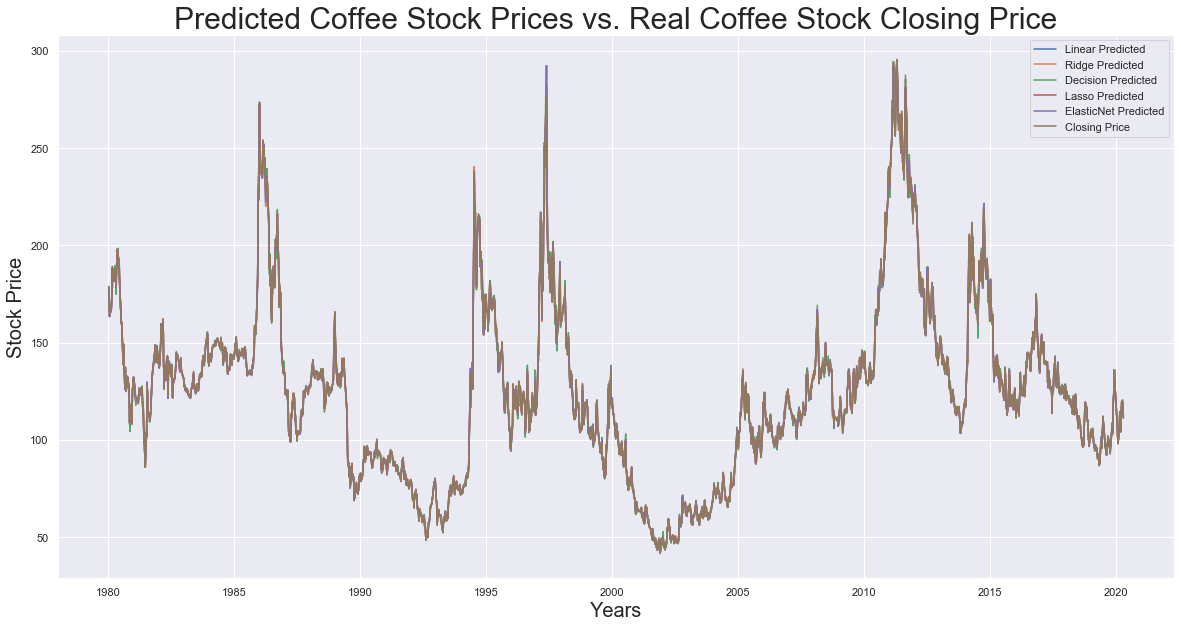

In [236]:
fig= plt.figure(figsize=(20,10))
plt.plot(df_final)
plt.legend(df_final)
plt.title("Predicted Coffee Stock Prices vs. Real Coffee Stock Closing Price",fontsize=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Stock Price", fontsize= 20)
plt.savefig("output/stcok.png")

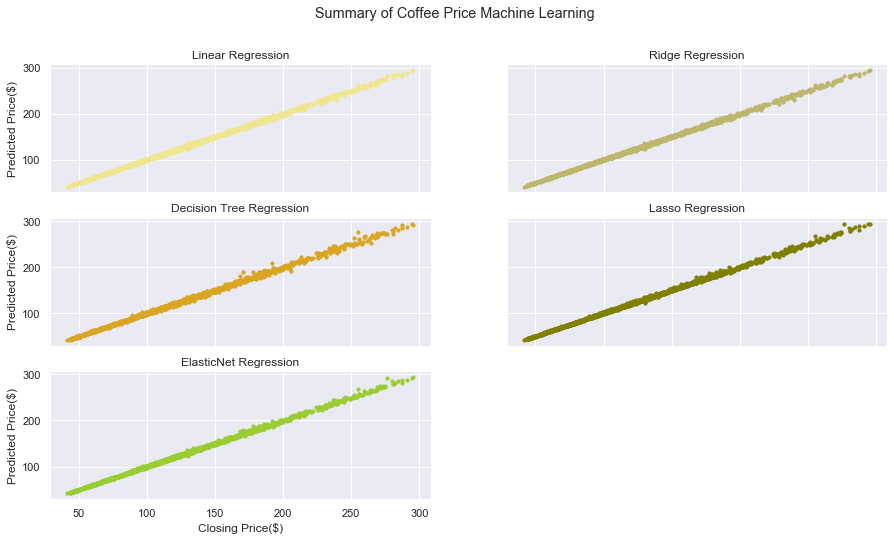

In [220]:
f, axs = plt.subplots(3,2, figsize=(15,8))
f.delaxes(axs[2,1]) #The indexing is zero-based here
axs[0, 0].scatter(df_final['Closing Price'], df_final['Linear Predicted'], color='khaki' , s=10)
axs[0, 1].scatter(df_final['Closing Price'], df_final['Ridge Predicted'], color='darkkhaki', s=10)
axs[1, 0].scatter(df_final['Closing Price'], df_final['Decision Predicted'], color='goldenrod', s=10)
axs[1, 1].scatter(df_final['Closing Price'], df_final['Lasso Predicted'], color='olive' , s=10)
axs[2, 0].scatter(df_final['Closing Price'], df_final['ElasticNet Predicted'], color='yellowgreen' , s=10)

axs[0, 0].set_title("Linear Regression")
axs[0, 1].set_title("Ridge Regression")
axs[1, 0].set_title("Decision Tree Regression")
axs[1, 1].set_title("Lasso Regression")
axs[2, 0].set_title("ElasticNet Regression")

for ax in axs.flat:
    ax.set(xlabel='Closing Price($)', ylabel='Predicted Price($)') 
    ax.label_outer()
    
f.suptitle('Summary of Coffee Price Machine Learning')
f.savefig('output/summary.png')


## Coffee Price Modeling Analysis
X,y are determined to make modelings to predict the coffee prices. X would be opening price, high price, and low price. y would be closing price. When x,y are plotted, it shows linear line, which suggests that linear regressiong modeling would be a good choice for this dataset. Linear regression, Ridge regression, Lasso regression,ElasticNet regression, and Decision tree regression are selected to predict the coffee stock prices. All modelings have accuracy over 0.98, and when actual price and predicted price are plotted, and it shows as linear graph. The noises in the graphs are so little, it is negletable. 

In [223]:
lr_acc = (df_final['Closing Price'] - df_final['Linear Predicted'] ) / df_final['Closing Price']*100
rr_acc = (df_final['Closing Price'] - df_final['Ridge Predicted'] ) / df_final['Closing Price']*100
dt_acc = -(df_final['Closing Price'] - df_final['Decision Predicted']) / df_final['Closing Price']*100
la_acc = (df_final['Closing Price'] - df_final['Lasso Predicted'] ) / df_final['Closing Price']*100
el_acc = (df_final['Closing Price'] - df_final['ElasticNet Predicted'] ) / df_final['Closing Price']*100

print("Linear Regression Mean Percent Prediction Error:")
LR = lr_acc.mean()
print(LR)

print("Ridge Regression Mean Percent Prediction Error:")
RR = rr_acc.mean()
print(RR)

print("Decision Tree Regression Mean Percent Prediction Error:")
DT = dt_acc.mean()
print(DT)

print("Lasso Regression Mean Percent Prediction Error:")
LA = la_acc.mean()
print(LA)

print("ElasticNet Regression Mean Percent Prediction Error:")
EL = el_acc.mean()
print(EL)

Linear Regression Mean Percent Prediction Error:
0.00451813849278215
Ridge Regression Mean Percent Prediction Error:
0.004476832030139477
Decision Tree Regression Mean Percent Prediction Error:
0.0009344499341891868
Lasso Regression Mean Percent Prediction Error:
0.006117783558907618
ElasticNet Regression Mean Percent Prediction Error:
0.00609704023430988


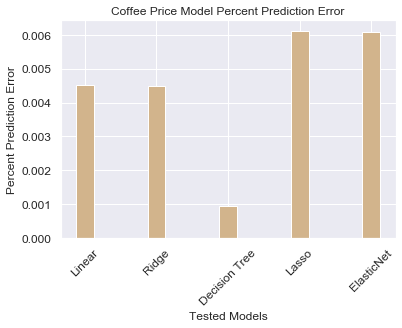

In [224]:
label = ['Linear', 'Ridge','Decision Tree', 'Lasso','ElasticNet']
array = [LR,RR,DT,LA,EL]
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
xloc = np.array(range(len(array)))
width=0.25
plt.bar(xloc,array,width=width, color='tan')
plt.xticks(xloc,label,fontsize=12)
plt.title("Coffee Price Model Percent Prediction Error")
plt.xlabel("Tested Models")
plt.ylabel("Percent Prediction Error")
plt.savefig("output/ppe.png",bbox_inches="tight")

[0.9993508976652573, 0.9993508891994224, 0.9982988346603872, 0.9990997588982997, 0.9990770983942867]


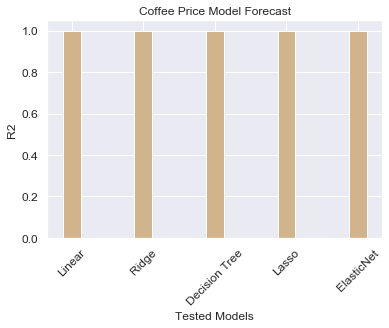

In [230]:
label = ['Linear', 'Ridge','Decision Tree', 'Lasso','ElasticNet']
array_2 = [r2_linear,ridge_r2,dt_r2,r2,el_r2]
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
xloc = np.array(range(len(array_2)))
width=0.25
plt.bar(xloc,array_2,width=width, color='tan')
plt.xticks(xloc,label,fontsize=12)
plt.title("Coffee Price Model Forecast")
plt.xlabel("Tested Models")
plt.ylabel("R2")
plt.savefig("output/r2e.png")
print(array_2)

## Coffee Price Analysis

As seen in cofee data analysis, High price is most important attribute predicting future coffee price. Open price is the second attribute predicting future coffee price. The error of each model is lower than 0.0001. R2 of each model is very close to be 1. The R2 values of Linear regression and Ridge regression are 0.99935, which are the higher than other models by 0.001. All models would be good to predict the future coffee price, but if almost perfect accuracy is required, then Linear or Ridge regression would be the best choice to use for prediction of coffee future price.